# Analyse real time features extracted from a debugging session

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import librosa
import librosa.display
import pickle

## Global settings
__Important:__ These settings have to match the ones in the STM32 application.

In [4]:
AUDIO_SAMPLING_FREQUENCY = 48000 # kHz 
NB_FFTS = 32 # How many columns for the short time fourier transformation
NB_BINS = 30 # Resolution (bins) of one STFT column
HOP_LENGTH = 512 # Jumps between FFT windows
FRAME_SIZE = HOP_LENGTH*NB_FFTS + HOP_LENGTH # For one spectrogram column 1024 samples are needed
NB_FRAMES = 100 # Total number of frames recorded in one WAV file
FFT_SIZE = 1024 # Size for one FFT
FREQ_MIN = 5000 # Lowest bin for the columns
TOP_DB = 80 # Cut off of DBs

## Import features
Load real-time spectrograms i.e the features for the neural network

In [7]:
features = np.loadtxt('real_time_features.txt', delimiter=',')
features = features.reshape(NB_BINS, NB_FFTS)

## Normalize features
This is needed if features are extracted before the normalization of the STM32 application.

In [8]:
normalize_dir = './normalize/'
scaler = pickle.load(open(normalize_dir + 'scaler.pkl', 'rb'))
features = features.reshape(1, NB_BINS*NB_FFTS)
features = scaler.transform(features)
features = features.reshape(NB_BINS, NB_FFTS)

## Plot spectrogram

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


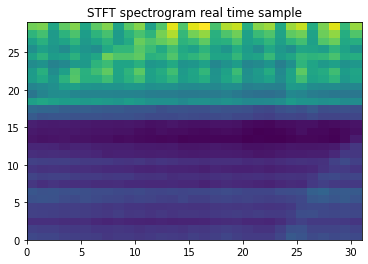

In [12]:
# Plot STFT spectrogram
z = features.transpose()
grid_x, grid_y = np.mgrid[:32, :30]

plt.title('STFT spectrogram real time sample')
plt.pcolormesh(grid_x, grid_y, z)
plt.show()

## Load model and make a prediction

In [13]:
# Load model
model = keras.models.load_model('wmc.h5', compile = True)

In [15]:
# Make the prediction
features_r = features.reshape(1, NB_BINS, NB_FFTS, 1)
prediction = model.predict(features_r)

print(prediction)

[[0.01445446 0.968246   0.01729961]]
